In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
config = {
    "font.family": 'serif',
    "mathtext.fontset": 'stix',
    "font.sans-serif": ['Times New Roman'],
}
plt.rcParams.update(config)
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [2]:
data = np.load('data/data.npy',allow_pickle=True)
en_dict = {ele: en for i in data for ele, en in zip(i['element'], i['EN'])}
num_dict = {ele: num for i in data for ele, num in zip(i['element'], i['atom_num'])}
data[-1]

{'name': 'FL-C-7',
 'element': ['Y', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Gd'],
 'atom_num': ['39', '57', '58', '59', '60', '62', '64'],
 'EN': [1.22, 1.1, 1.12, 1.13, 1.14, 1.17, 1.2],
 'w': [0.12772070346508796,
  0.13790701723837714,
  0.13790701723837717,
  0.1337280167160021,
  0.1364269545533693,
  0.12745951593243948,
  0.19885077485634686],
 'yield': [0.09255779476373263,
  2784.7780999999995,
  32.71209999999999,
  60.7027],
 'xrd': array([[10, 0],
        [10.02049, 0],
        [10.04098, 0],
        ...,
        [89.95589, 0],
        [89.97637, 0],
        [89.99686, 0]], dtype=object)}

In [3]:
type_array = np.array([i['name'][:-2] for i in data])
encoder = preprocessing.OneHotEncoder()
type_array = encoder.fit_transform(type_array.reshape(-1,1)).toarray()
type_df = pd.DataFrame(type_array,columns=encoder.categories_[0])
type_df.columns = [i.replace('FL','BI') for i in type_df.columns]
type_df

,BI-A,BI-B,BI-C,PE-A,RS-A,SP-A,SP-B
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## yield analysis

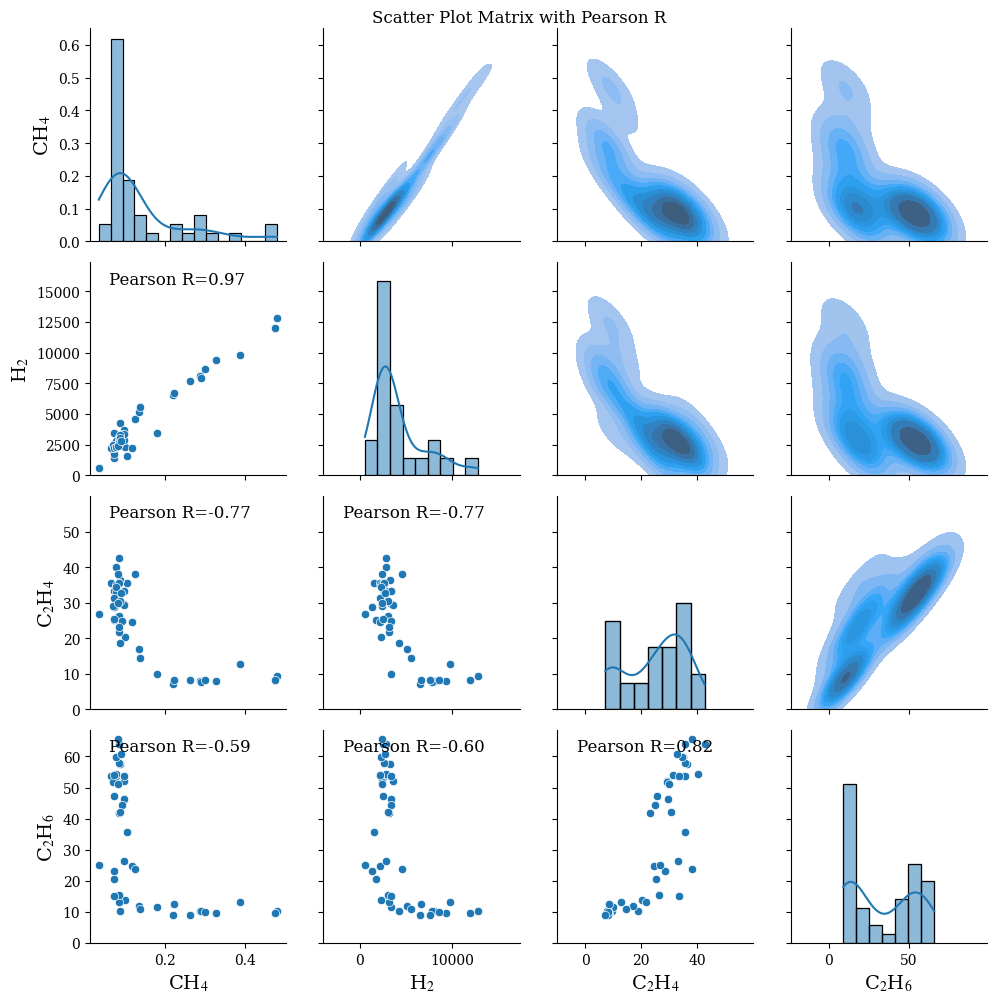

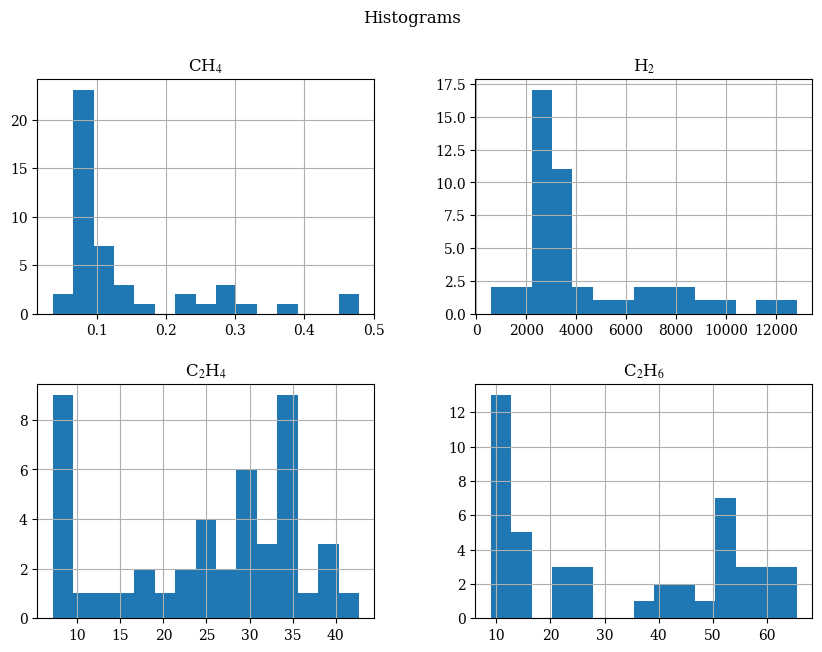

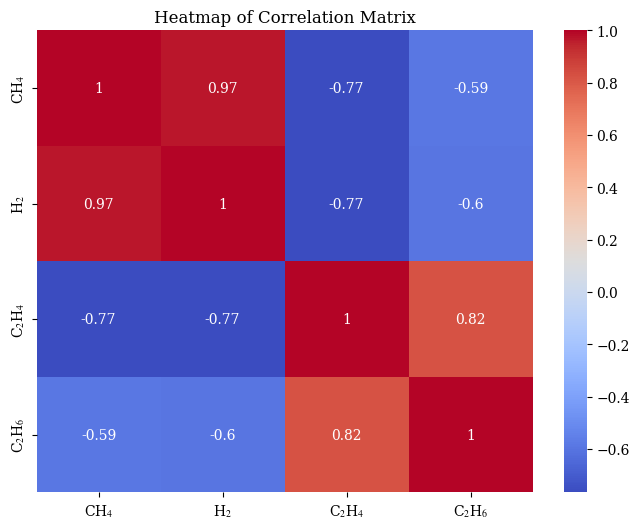

In [4]:
from scipy.stats import pearsonr
all_yield = np.array([i['yield'] for i in data])
yield_df = pd.DataFrame(all_yield, columns=['CH$_4$', 'H$_2$', 'C$_2$H$_4$', 'C$_2$H$_6$'])


def corrfunc(x, y, **kws):
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f'Pearson R={r:.2f}', xy=(0.1, 0.9), xycoords=ax.transAxes, fontsize=12, color='black')


g = sns.PairGrid(yield_df)
g.map_lower(sns.scatterplot)  
g.map_lower(corrfunc)         
g.map_upper(sns.kdeplot, fill=True)  
g.map_diag(sns.histplot, kde=True)   
g.set(ylim=(0, None))

for ax in g.axes.flatten():
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
plt.suptitle('Scatter Plot Matrix with Pearson R', verticalalignment='bottom')
plt.show()


yield_df.hist(bins=15, figsize=(10, 7))
plt.suptitle('Histograms')
plt.show()



plt.figure(figsize=(8, 6))
sns.heatmap(yield_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

## atomic feature

In [5]:
all_num = []
for i in data:
    all_num.extend(i['element'])
num_set = list(set(all_num))
num_set

['Zn',
 'Co',
 'Cr',
 'Sm',
 'Fe',
 'Cu',
 'Y',
 'Nd',
 'Ni',
 'Ti',
 'Ce',
 'Mg',
 'Pr',
 'Gd',
 'Mn',
 'La']

In [6]:
w_df = pd.DataFrame(columns=num_set)
for idx,i in enumerate(data):
    for j,num in enumerate(i['element']):
        w_df.loc[idx,num] = i['w'][j]
w_df.fillna(0,inplace=True)
w_df

,Zn,Co,Cr,Sm,Fe,Cu,Y,Nd,Ni,Ti,Ce,Mg,Pr,Gd,Mn,La
0,0.177481,0.204305,0.000000,0.000000,0.000000,0.204432,0.000000,0.000000,0.207178,0.000000,0.000000,0.206604,0.000000,0.000000,0.000000,0.000000
1,0.156138,0.190289,0.000000,0.000000,0.000000,0.174970,0.000000,0.000000,0.187197,0.000000,0.000000,0.291406,0.000000,0.000000,0.000000,0.000000
2,0.162579,0.288231,0.000000,0.000000,0.000000,0.160958,0.000000,0.000000,0.191050,0.000000,0.000000,0.197181,0.000000,0.000000,0.000000,0.000000
3,0.156993,0.181387,0.000000,0.000000,0.000000,0.191022,0.000000,0.000000,0.271010,0.000000,0.000000,0.199587,0.000000,0.000000,0.000000,0.000000
4,0.169811,0.183325,0.000000,0.000000,0.000000,0.283593,0.000000,0.000000,0.183070,0.000000,0.000000,0.180201,0.000000,0.000000,0.000000,0.000000
5,0.259373,0.186979,0.000000,0.000000,0.000000,0.188380,0.000000,0.000000,0.181863,0.000000,0.000000,0.183405,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.206164,0.192181,0.000000,0.207020,0.000000,0.000000,0.000000,0.191254,0.000000,0.000000,0.000000,0.000000,0.000000,0.203381,0.000000
7,0.000000,0.192019,0.258477,0.000000,0.185452,0.000000,0.000000,0.000000,0.180741,0.000000,0.000000,0.000000,0.000000,0.000000,0.183311,0.000000
8,0.000000,0.192086,0.171383,0.000000,0.188649,0.000000,0.000000,0.000000,0.179536,0.000000,0.000000,0.000000,0.000000,0.000000,0.268345,0.000000
9,0.000000,0.192040,0.173010,0.000000,0.278111,0.000000,0.000000,0.000000,0.176958,0.000000,0.000000,0.000000,0.000000,0.000000,0.179880,0.000000


In [7]:
sorted_columns = sorted(w_df.columns, key=lambda col: num_dict[col])
w_df = w_df[sorted_columns]
atom_df = pd.concat([yield_df,w_df,type_df], axis=1)
atom_df

,CH$_4$,H$_2$,C$_2$H$_4$,C$_2$H$_6$,Mg,Ti,Cr,Mn,Fe,Co,...,Nd,Sm,Gd,BI-A,BI-B,BI-C,PE-A,RS-A,SP-A,SP-B
0,0.327199,9394.2836,7.8673,9.5027,0.206604,0.000000,0.000000,0.000000,0.000000,0.204305,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.102170,2298.8186,20.4241,13.9227,0.291406,0.000000,0.000000,0.000000,0.000000,0.190289,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.478854,12846.1931,9.4801,10.4427,0.197181,0.000000,0.000000,0.000000,0.000000,0.288231,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.474620,12024.0926,8.2897,9.5627,0.199587,0.000000,0.000000,0.000000,0.000000,0.181387,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.181303,3428.9216,10.0369,11.5227,0.180201,0.000000,0.000000,0.000000,0.000000,0.183325,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.386938,9819.4031,12.6673,13.1827,0.183405,0.000000,0.000000,0.000000,0.000000,0.186979,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.074133,1390.7816,28.6417,23.0427,0.000000,0.000000,0.192181,0.203381,0.207020,0.206164,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.073640,1752.0191,25.1665,20.6827,0.000000,0.000000,0.258477,0.183311,0.185452,0.192019,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.119554,2246.3441,24.6481,24.6227,0.000000,0.000000,0.171383,0.268345,0.188649,0.192086,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.105479,1587.7511,35.5345,35.6227,0.000000,0.000000,0.173010,0.179880,0.278111,0.192040,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## element analysis

In [8]:
def extract_df(col):
    filter_df = atom_df[atom_df[col]==1].copy()
    filter_df = filter_df.loc[:, (filter_df != 0).any(axis=0)]
    label = filter_df.iloc[:,4:-1].columns
    w = filter_df.iloc[:,4:-1].to_numpy()
    target = filter_df.iloc[:,3].to_numpy()
    return col,label,w,target

def plot(title,label,w,target):
    num_vars = len(label)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1] 


    w = np.array([np.append(row, row[0]) for row in w])


    yield_norm = Normalize(min(target), max(target))
    cmap = plt.get_cmap('coolwarm')

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    for idx, row in enumerate(w):
        ax.fill(angles, row, color=cmap(yield_norm(target[idx])), alpha=0.35)
        ax.plot(angles, row, color='black', linewidth=1)
    

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(label)
    # ax.set_ylim(0, 0.25)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=yield_norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, pad=0.1)
    cbar.set_label('C$_2$H$_6$ yield')
    plt.title(f'{title}')
    plt.show()
    return

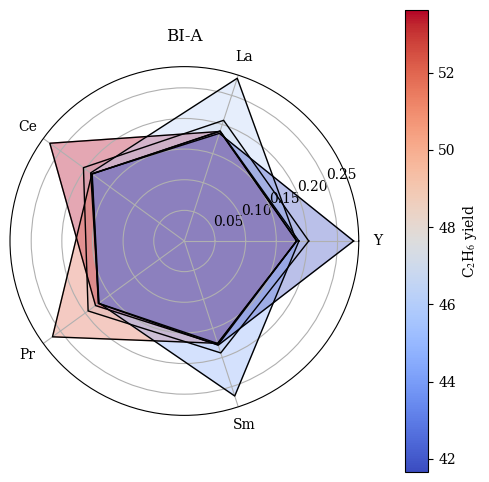

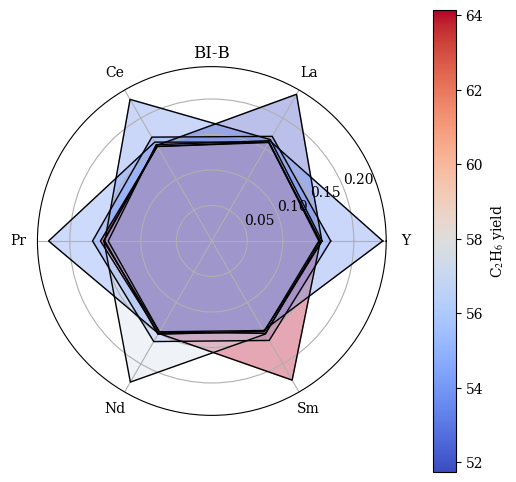

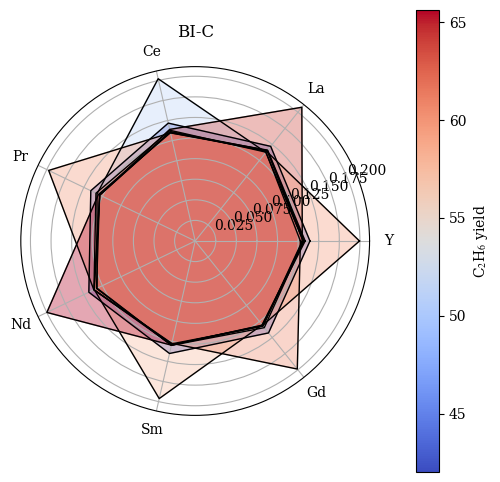

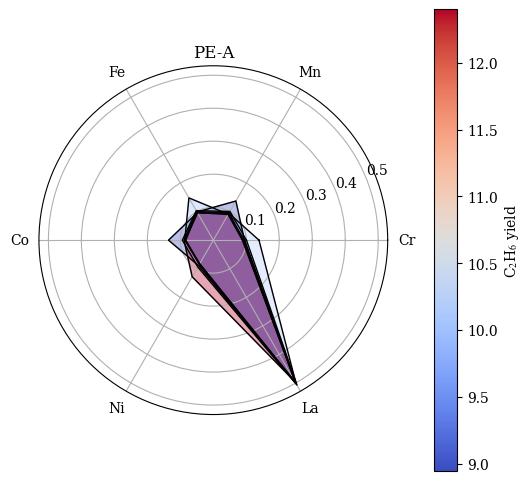

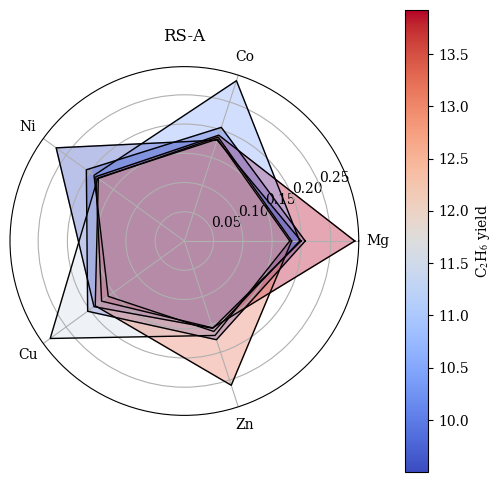

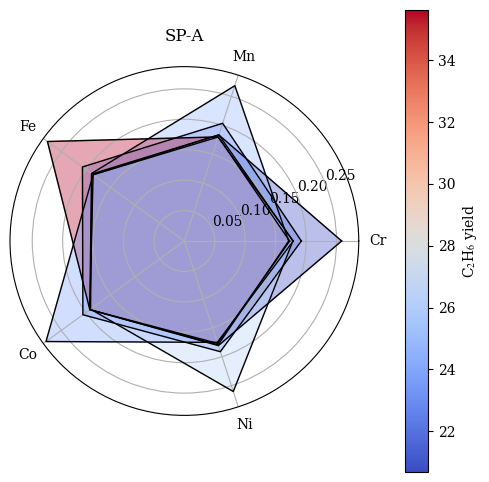

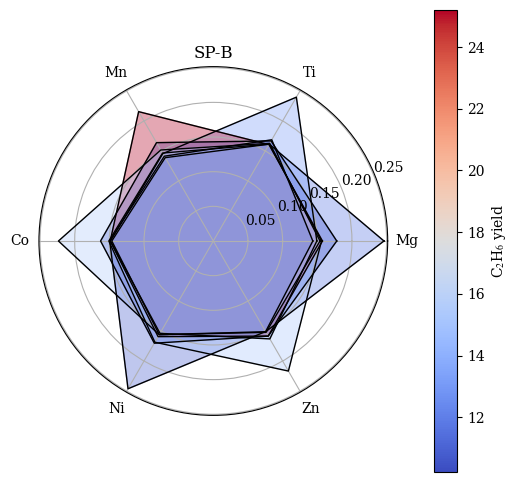

In [9]:
for col in type_df.columns:
    plot(*extract_df(col))